## Preface

Alright, we had to go through a fair amount to get jupyter working with R on a newer linux kernel. It seems there's a lot of jank, still, with R as a jupyter kernel. I get why udacity wants us to do it, but it's so far from ideal to do R in jupyter.

### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [92]:
ny_data = read.csv('new-york-city.csv')
washington_data = read.csv('washington.csv')
chicago_data = read.csv('chicago.csv')

In [93]:
head(ny_data, 1)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998


In [90]:
head(washington_data, 1)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber


In [91]:
head(chicago_data, 1)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992


### Okay then.
Alright, I'm not going to ask deep questions here. This is bike share ride data...The requirements are just to "pick and answer three questions about the [available data]".
So we'll just ask it in order based on the dataset order we were provided.

In [65]:
# Function definitions and housekeeping:

# to compare start time and x values in random samples. This is for the Chicago data because I just wanted to verify its nature.
check_mismatch <- function(data, n_samples = 100) {
  # Check column names
  if (!("Start.Time" %in% names(data)) || !("X" %in% names(data))) {
    stop("The data must contain 'Start.Time' and 'X' columns.")
  }

  # Samplling
  sample_indices <- sample(1:nrow(data), n_samples, replace = TRUE)
  sample_data <- data[sample_indices, ]

  # O(N)
  for (i in 2:n_samples) {
    start_time_i <- as.POSIXct(sample_data$Start.Time[i])
    start_time_prev <- as.POSIXct(sample_data$Start.Time[i - 1])
    
    if ((start_time_i > start_time_prev && sample_data$X[i] <= sample_data$X[i - 1]) ||
        (start_time_i < start_time_prev && sample_data$X[i] >= sample_data$X[i - 1])) {
      return(TRUE) # Mismatch found
    }
  }

  return(FALSE) # No mismatches found
}


### Question 1
***New York***

Certain stations are probably closer to schools, retirement homes, youth activities, etc. There ought to be a strong correlation between age and station, if the companies involved placed their stations to target youths. 
Which stations in New York have the lowest average age of rider? We don't need to differentiate between whether it's the start or the end station, as a youth destination would naturally have younger riders arriving and leaving from it, shifting the age distribution of all trips. We wouldn't be able to describe the behavior of people as far as departures and arrivals go based on this data with any serious accuracy.

In [109]:
# I don't anticipate this will be computationally efficient without  using a vectorized operation.
# I don't remember off-hand if R uses vectorized operations bone stock like this. So we'll just rely
# on a for-loop.
# Let's get a list of all stations
all_stations <- unique(c(ny_data$Start.Station, ny_data$End.Station))
length(all_stations)
nrow(ny_data)

[1] 646

[1] 300000

656 Stations. Wow, that's a lot. And we have 300,000 items. Welp, I'm not going to lean on a library here. Enjoy waiting on the for-loop to do... 194 million plus sets of operations! I know some way to optimize it, but I'm not going to!

In [112]:
avg_birth_years <- numeric(length(all_stations))
names(avg_birth_years) <- all_stations

for (station in all_stations) {
    relevant_trips <- ny_data[ny_data$Start.Station == station | ny_data$End.Station == station, ]
    avg_birth_year <- mean(relevant_trips$Birth.Year, na.rm = TRUE) # Just in case someone didn't give a birth year. I doubt I need to do this.
    avg_birth_years[station] <- avg_birth_year
}

# Data frame it for viewing ease
avg_birth_years_df <- data.frame(Station = names(avg_birth_years), AvgBirthYear = unname(avg_birth_years))

#sort it
sorted_avg_birth_years_df <- avg_birth_years_df[order(avg_birth_years_df$AvgBirthYear), ]

# lowest 10 stations
cat("Lowest 10 Stations by Average Birth Year:\n")
print(head(sorted_avg_birth_years_df, 10))

# highest 10 stations
cat("Highest 10 Stations by Average Birth Year:\n")
print(tail(sorted_avg_birth_years_df, 10))

# overall average birth year
overall_avg_birth_year <- mean(ny_data$Birth.Year, na.rm = TRUE)
cat("Overall Average Birth Year:", overall_avg_birth_year, "\n")

Lowest 10 Stations by Average Birth Year:
                            Station AvgBirthYear
641               6 Ave & Spring St     1956.500
645                  Van Vorst Park     1966.000
604 Penn Station Valet - Valet Scan     1971.643
476             Garfield Pl & 8 Ave     1971.761
615                  21 St & 41 Ave     1971.933
563          Riverside Dr & W 82 St     1972.296
117      Columbia St & Rivington St     1972.664
468              E 81 St & Park Ave     1972.698
463          W 88 St & West End Ave     1972.765
632                W 15 St & 10 Ave     1972.842
Highest 10 Stations by Average Birth Year:
                               Station AvgBirthYear
251               Boerum St & Broadway     1985.207
70              Leonard St & Maujer St     1985.632
638                  NYCBS Depot - GOW     1986.000
623             Humboldt St & Varet St     1986.225
640                  NYCBS Depot - PIT     1987.000
578 Industry City, Building 1 Basement     1988.364
637         

In [111]:
head(sorted_avg_birth_years_df)

,Station,AvgBirthYear
,<chr>,<dbl>
6 Ave & Spring St,6 Ave & Spring St,1956.500
Van Vorst Park,Van Vorst Park,1966.000
Penn Station Valet - Valet Scan,Penn Station Valet - Valet Scan,1971.643
Garfield Pl & 8 Ave,Garfield Pl & 8 Ave,1971.761
21 St & 41 Ave,21 St & 41 Ave,1971.933
Riverside Dr & W 82 St,Riverside Dr & W 82 St,1972.296


**Conclusion**

Well, as we figured, there are some pretty clear difference sin age for certain stations.
Answering this question could significantly influence how a bike share service allocates ad spots for people hoping to post ads at their stations, and also likely determines a lot of other things that could help reduce costs fro these services

### Question 2
***Washington***

I saw some decimal points on the trip duration that weren't there in the other two data sets. So we'll work from that. Are longer trips taken during the day or the night? By customers or subscribers? Let's build a profile of the average person who spends a long time on a borris bike.

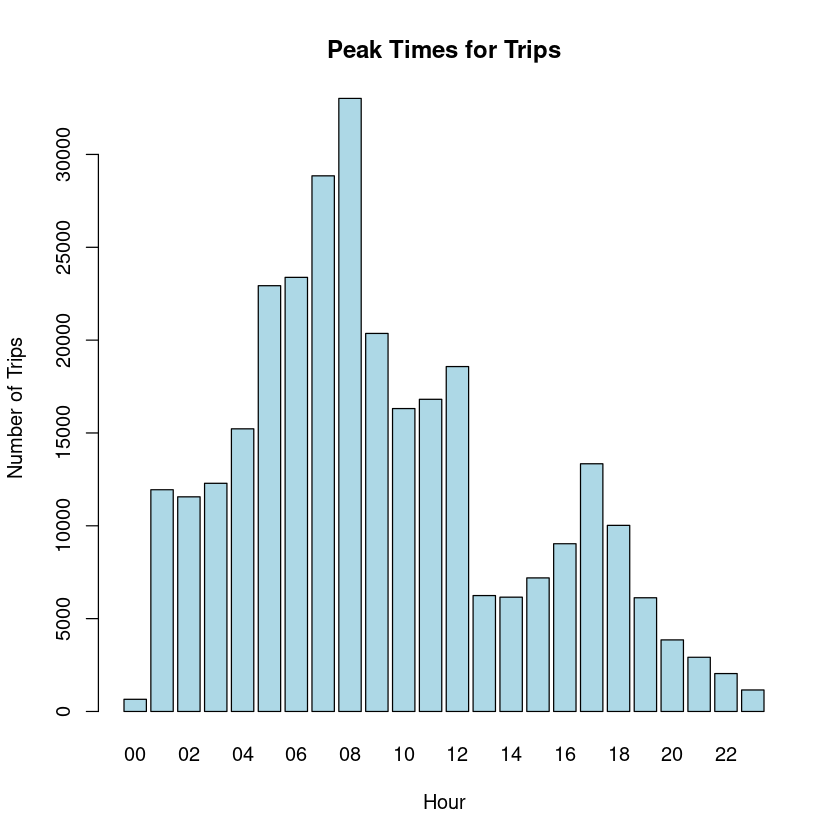

In [71]:
# Average time:
set.seed(123)
# Let's just extract our hours to see what time the average ride is starting.
hours <- format(as.POSIXct(washington_data$Start.Time), "%H")

# Plot peak times
barplot(table(hours), main = "Peak Times for Trips", xlab = "Hour", ylab = "Number of Trips", col = "lightblue")

It looks like we have some anomalies in the data distribution around midnight, and also the average trip occurs before 1PM, with upticks around 5PM and 8AM, as you'd expect. The midnight to 1AM anomoly is probably just from the service not being available.

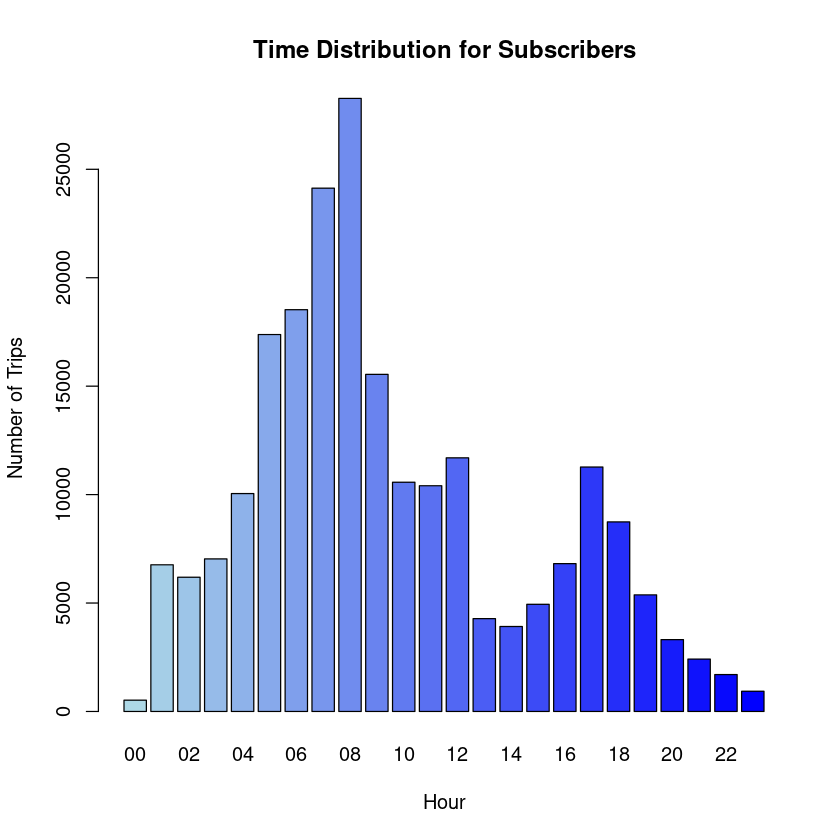

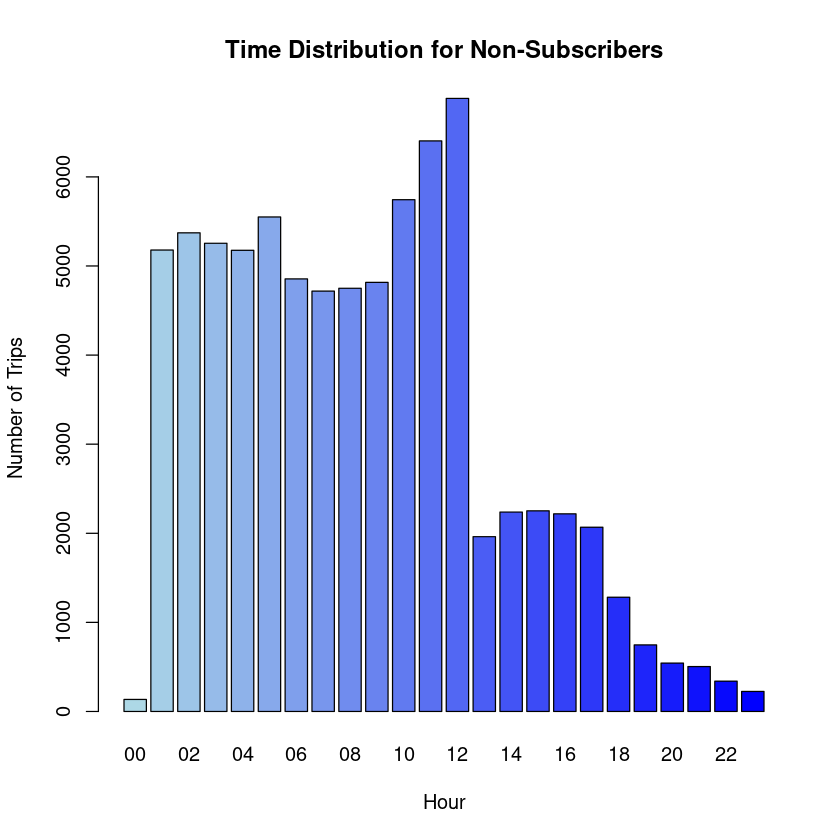

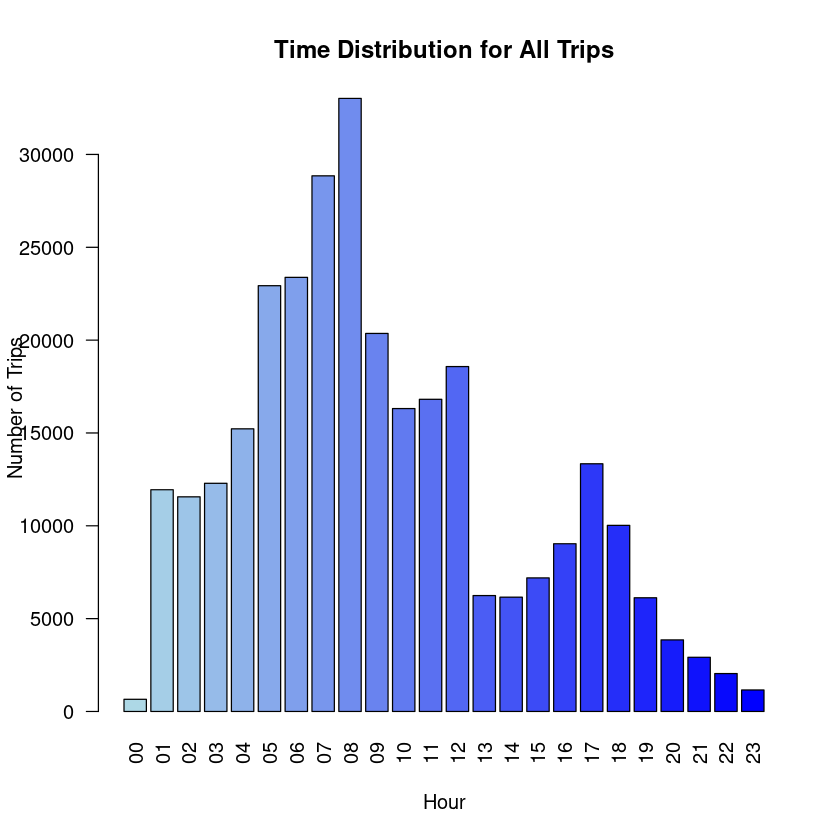

In [87]:
set.seed(123)

# We don't want to modify our original data. So we convert the date to a usable format when we create 
# our subset of the data.
subscriber_hours <- table(format(as.POSIXct(washington_data$Start.Time[washington_data$User.Type == "Subscriber"]), "%H"))
nonsubscriber_hours <- table(format(as.POSIXct(washington_data$Start.Time[washington_data$User.Type == "Customer"]), "%H"))
all_hours <- table(format(as.POSIXct(washington_data$Start.Time), "%H"))

# Plot time distribution for subscribers and non-subscribers
# Define gradient colors to make this pretty
gradient_colors <- colorRampPalette(c("lightblue", "blue"))(24)
# Plot time distribution for subscribers
barplot(subscriber_hours, col = gradient_colors, 
        main = "Time Distribution for Subscribers", 
        xlab = "Hour", ylab = "Number of Trips", 
        names.arg = sprintf("%02d", 0:23))

# time distribution for non-subscribers
barplot(nonsubscriber_hours, col = gradient_colors, 
        main = "Time Distribution for Non-Subscribers", 
        xlab = "Hour", ylab = "Number of Trips", 
        names.arg = sprintf("%02d", 0:23))

# And all trips
barplot(all_hours, col = gradient_colors, 
        main = "Time Distribution for All Trips", 
        xlab = "Hour", ylab = "Number of Trips", 
        names.arg = sprintf("%02d", 0:23), las = 2)

That's interesting. Customers and subscribers use the service in totall different ways. Nobody is taking trips at 00 but then a ton at 01 and 02... so that doesn't make any sense unless the service is simply unavailable during the midnight hour. The massive jump from 2300 to 0100 is weird, too.
But yeah, we can draw a few things from this. Subscribers use the service much differently, and in higher volumes. Those conclusions are apparent at face value.

**Conclusion**

It looks like the typical trip taker is a subscriber starting their ride before noon. Which is really weird. I'm inclined to think this data is artificial because of how sharp the distribution is.




---

### Question 3
***Chicago***

My initial instinct here is to grab some geospatial data to enrich this. Proximity to the waterfront, gdp of an area, etc. That's a little out of the scope of this and more like what I do as a professional.
It looks like the "x" is a unique id for the trip. But, there's only 300,000 rows, and the spread is obviously wider than that. 

Let me do some leg work first (see the function declaration above):

In [66]:
# This will tell us if we have any situations where there is a column which doesn't meet this condition:
# 1. Two rows should be sequentially consistent, where X is greater on one, Start.Time should also be greater.
# Confirming this tells us that X is a sequential key for our data.
result <- check_mismatch(chicago_data)
cat("Mismatch found:", result, "\n")

Mismatch found: FALSE 


Sweet, that means we can tackle the question "have trips been growing or shrinking in duration" without looking at the date columns specifically.

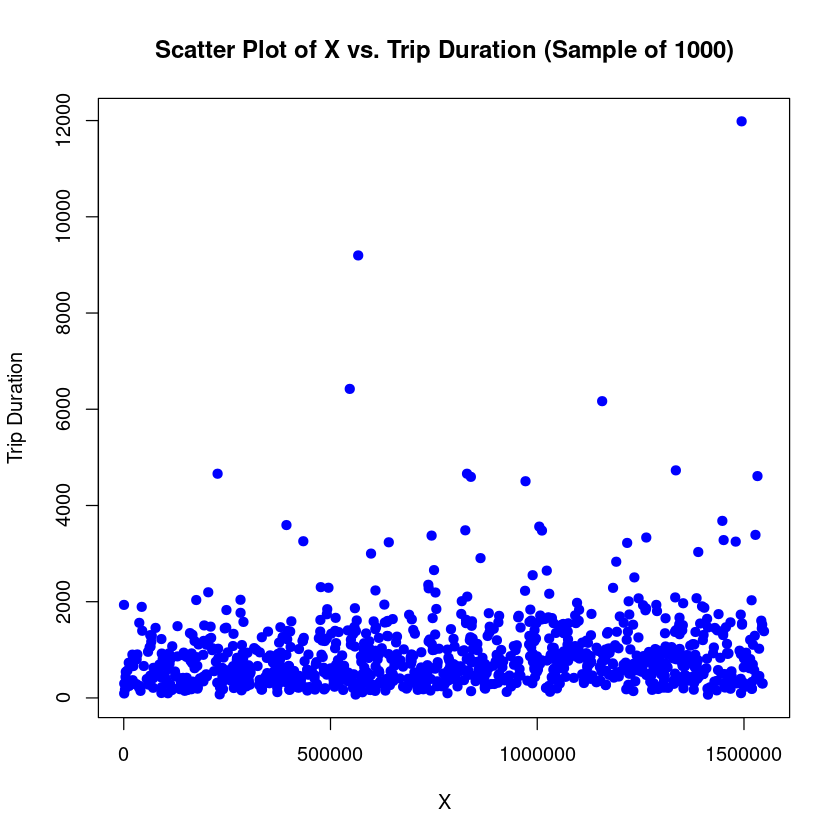

In [67]:
# We have 300,000 rows, so that won't create a nice scatter chart.
# I set a seed above so this is reproducible. 
set.seed(123)
sample_size <- 1000  # Define the sample size
sample_indices <- sample(1:nrow(chicago_data), sample_size)
sample_data <- chicago_data[sample_indices, ]
# And a basic plot to illustrate it:
plot(sample_data$X, sample_data$Trip.Duration, 
     xlab = "X", ylab = "Trip Duration", 
     main = "Scatter Plot of X vs. Trip Duration (Sample of 1000)",
     pch = 19, col = "blue")


That doesn't look promising...
Let's run a test, maybe?

In [68]:
cor.test(sample_data$X, sample_data$Trip.Duration)


	Pearson's product-moment correlation

data:  sample_data$X and sample_data$Trip.Duration
t = 4.9069, df = 998, p-value = 1.08e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09237022 0.21344654
sample estimates:
      cor 
0.1534844 


In [69]:
#  linear regression
model <- lm(Trip.Duration ~ X, data = sample_data)
summary(model)


Call:
lm(formula = Trip.Duration ~ X, data = sample_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -991.2  -456.1  -192.8   246.2 10901.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.564e+02  5.199e+01  12.624  < 2e-16 ***
X           2.851e-04  5.810e-05   4.907 1.08e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 817.4 on 998 degrees of freedom
Multiple R-squared:  0.02356,	Adjusted R-squared:  0.02258 
F-statistic: 24.08 on 1 and 998 DF,  p-value: 1.08e-06


**Conclusion**

Question 3 was a "yes" but only slightly so. There's a statistically significant and weak positive correlation between duration of a trip and the date it was taken, using the unique ID of the trip as a stand-in for the date.

How do we know this? We had an exceptionally small p-value, and our t-value is pretty large, both of which allow us to reject the null hypothesis with some certainty. Our regression analysis also has stars. Keep in mind, it's not doing anything different from my first model, it just presents it differently with some additional tests.

We did it! We answered this question!

---


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# I'll just submit my own html rather than converting it with the provided code.